# RandomForestClassifier

In [1]:
import os

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    precision_score,
    recall_score,
    accuracy_score,
    f1_score,
    log_loss,
    roc_auc_score,
    precision_recall_curve,
    roc_curve
)
from tqdm import tqdm

import matplotlib.pyplot as plt

### Load data

In [2]:
dataset = pd.read_csv(os.path.join('data', 'bioresponse.csv'))

In [3]:
dataset.head(5)

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


### Train

In [4]:
X = dataset.drop('Activity', axis=1)
y = dataset.loc[:, 'Activity'].values

In [5]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Best model

In [6]:
best_model = RandomForestClassifier(
    n_estimators=100,
    criterion="entropy",
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=1,
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
    class_weight='balanced'
)
best_model.fit(X=X_train, y=y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, min_samples_split=5, n_jobs=-1,
                       random_state=42)

### Find best thresholt in order to avoid Type II (False Negative) errors

In [7]:
thresholds = np.linspace(0, 1, 9)
train_recall_scores = []
test_recall_scores = []
for temp_threshold in tqdm(thresholds):
    temp_y_train_pred_proba = best_model.predict_proba(X=X_train)[:, 1]
    temp_y_test_pred_proba = best_model.predict_proba(X=X_test)[:, 1]

    temp_y_train_pred = np.where(temp_y_train_pred_proba > temp_threshold, 1, 0)
    temp_y_test_pred = np.where(temp_y_test_pred_proba > temp_threshold, 1, 0)

    train_recall_scores.append(recall_score(y_true=y_train, y_pred=temp_y_train_pred))
    test_recall_scores.append(recall_score(y_true=y_test, y_pred=temp_y_test_pred))

100%|██████████| 9/9 [00:00<00:00, 12.16it/s]


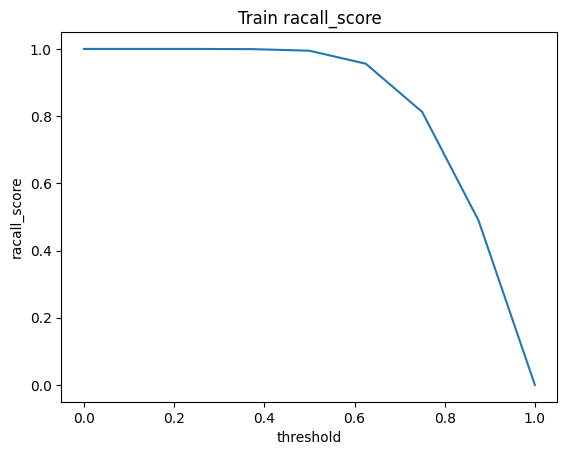

In [8]:
plt.plot(thresholds, train_recall_scores)
plt.ylabel("racall_score")
plt.xlabel("threshold")
plt.title("Train racall_score")
plt.show()

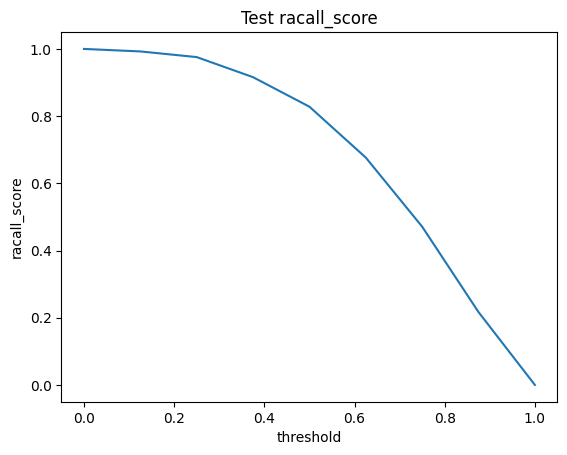

In [9]:
plt.plot(thresholds, test_recall_scores)
plt.ylabel("racall_score")
plt.xlabel("threshold")
plt.title("Test racall_score")
plt.show()

So the best threshold is about 0.25

In [10]:
# metrics
y_train_pred_proba = best_model.predict_proba(X=X_train)[:, 1]
y_test_pred_proba = best_model.predict_proba(X=X_test)[:, 1]
y_train_pred = np.where(y_train_pred_proba > 0.25, 1, 0)
y_test_pred = np.where(y_test_pred_proba > 0.25, 1, 0)

print(f"train precision_score: {np.round(precision_score(y_true=y_train, y_pred=y_train_pred), 4)}")
print(f"test precision_score: {np.round(precision_score(y_true=y_test, y_pred=y_test_pred), 4)}")
print()
print(f"train recall_score: {np.round(recall_score(y_true=y_train, y_pred=y_train_pred), 4)}")
print(f"test recall_score: {np.round(recall_score(y_true=y_test, y_pred=y_test_pred), 4)}")
print()
print(f"train accuracy_score: {np.round(accuracy_score(y_true=y_train, y_pred=y_train_pred), 4)}")
print(f"test accuracy_score: {np.round(accuracy_score(y_true=y_test, y_pred=y_test_pred), 4)}")
print()
print(f"train f1_score: {np.round(f1_score(y_true=y_train, y_pred=y_train_pred), 4)}")
print(f"test f1_score: {np.round(f1_score(y_true=y_test, y_pred=y_test_pred), 4)}")
print()
print(f"train log_loss: {np.round(log_loss(y_true=y_train, y_pred=y_train_pred_proba), 4)}")
print(f"test log_loss: {np.round(log_loss(y_true=y_test, y_pred=y_test_pred_proba), 4)}")
print()
print(f"train roc_auc_score: {np.round(roc_auc_score(y_true=y_train, y_score=y_train_pred_proba), 4)}")
print(f"test roc_auc_score: {np.round(roc_auc_score(y_true=y_test, y_score=y_test_pred_proba), 4)}")

train precision_score: 0.862
test precision_score: 0.6658

train recall_score: 1.0
test recall_score: 0.9757

train accuracy_score: 0.9147
test accuracy_score: 0.7068

train f1_score: 0.9259
test f1_score: 0.7915

train log_loss: 0.1797
test log_loss: 0.4565

train roc_auc_score: 0.9998
test roc_auc_score: 0.8756
